In [2]:
# 필요패키지 import
import numpy as np
import pandas as pd
from datetime import datetime
import csv # csv 파일 저장
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
# 한글폰트 사용
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [134]:
# 개별종목 주가 csv 파일 불러오기 
df = pd.read_csv('./data/주가 데이터/A096770_total_data(수정주가).csv', engine='python')

In [135]:
df

,날짜,시가,고가,저가,종가,거래량,외국인소진율
0,20070725,160000,170000,155000,169500,2853735,44.67
1,20070726,168000,169500,150000,150000,2132041,44.51
2,20070727,147000,159000,139000,148000,1205584,44.53
3,20070730,145000,157500,145000,157500,571034,44.46
4,20070731,155000,159000,152500,157000,368700,44.41
...,...,...,...,...,...,...,...
3502,20210927,249500,253500,249000,251500,366280,23.60
3503,20210928,257000,263000,252500,261000,1163946,23.89
3504,20210929,259000,269500,255000,265500,1258073,24.07
3505,20210930,268500,269000,262500,265000,577784,24.27


In [136]:
# int형식을 str로 변경
df['날짜'] = df['날짜'].astype('str')

In [137]:
# datetime을 이용해 출원날짜 데이터 형식 변경
df['날짜'] = pd.to_datetime(df['날짜'])
df

,날짜,시가,고가,저가,종가,거래량,외국인소진율
0,2007-07-25,160000,170000,155000,169500,2853735,44.67
1,2007-07-26,168000,169500,150000,150000,2132041,44.51
2,2007-07-27,147000,159000,139000,148000,1205584,44.53
3,2007-07-30,145000,157500,145000,157500,571034,44.46
4,2007-07-31,155000,159000,152500,157000,368700,44.41
...,...,...,...,...,...,...,...
3502,2021-09-27,249500,253500,249000,251500,366280,23.60
3503,2021-09-28,257000,263000,252500,261000,1163946,23.89
3504,2021-09-29,259000,269500,255000,265500,1258073,24.07
3505,2021-09-30,268500,269000,262500,265000,577784,24.27


In [138]:
# '월별' column 생성
df.insert(1,'월별', 0, allow_duplicates=False)

In [139]:
# '월별' column에 %Y-%m 형식으로 변경
df['월별'] = df['날짜'].dt.strftime('%Y-%m')

In [140]:
# '월별 평균종가'를 구성한 데이터 프레임
df_mean = df.groupby('월별')['종가'].agg(**{'월별 평균종가':'mean'}).reset_index()

In [141]:
df_mean

,월별,월별 평균종가
0,2007-07,156400.000000
1,2007-08,130727.272727
2,2007-09,153882.352941
3,2007-10,164704.545455
4,2007-11,184090.909091
...,...,...
167,2021-06,278704.545455
168,2021-07,265113.636364
169,2021-08,242000.000000
170,2021-09,250421.052632


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


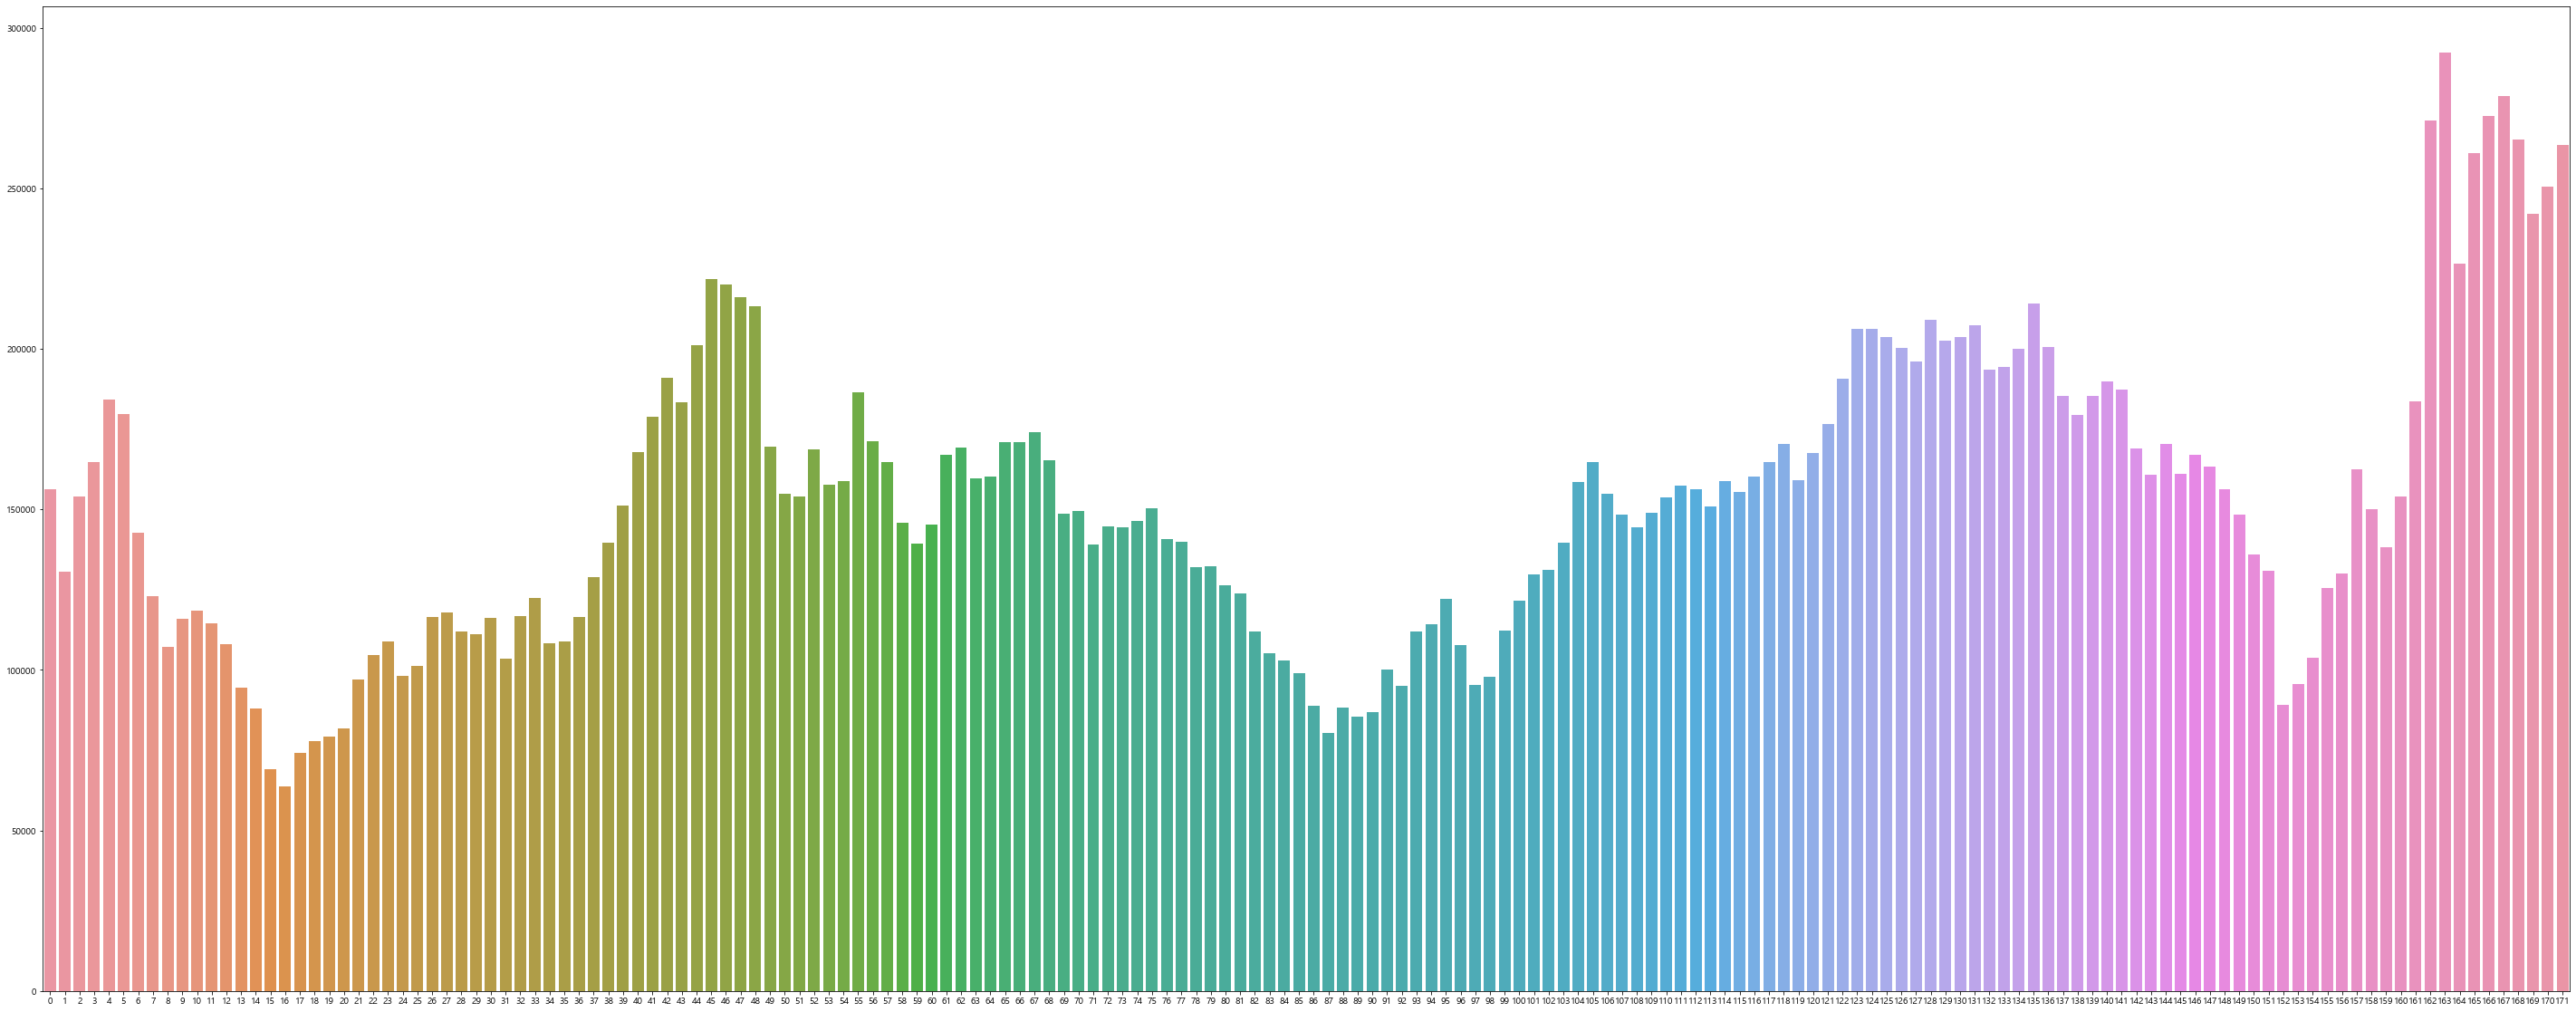

In [12]:
# 시각화 (월별(전체) - 월별 주가평균)
fig = plt.figure(figsize=(50, 20))
sns.barplot(df_mean['월별'].index, df_mean['월별 평균종가'].values)
plt.show()
#fig.savefig('./data/월별주가평균(삼성SDI).png')

In [142]:
# 개별 종목별 특허 건수

# 2차전지 특허 csv 파일 불러오기
df_1 = pd.read_csv('./data/new_secondary_cell_pluscode_wonoise_re.csv', engine='python')

In [143]:
df_1 = df_1[df_1['종목코드'].str.contains('A096770')]
df_1

,순서,출원번호,출원일자,출원년월,출원인,발명의명칭,공고일자,공개일자,등록일자,발명자,요약,종목코드
23,60,10-2008-0072276,2008-07-24,2008-07,에스케이이노베이션 주식회사(서울특별시 종로구...),이차전지 모듈팩(Module pack For Secondary Battery),2012.04.30,2009.03.24,2012.04.19,윤정식(대전광역시 서구...)|오전근(대전광역시 유성구...)|이은주(서울특별시 동...,본 발명은 이차전지 모듈팩을 개시한다. 본 발명의 이차전지 모듈팩은 충방전이 가능한...,A096770
45,89,10-2012-0112289,2012-10-10,2012-10,에스케이이노베이션 주식회사(서울특별시 종로구...),파우치형 이차전지 제조방법 및 파우치형 이차전지(Manufacturing metho...,2018.12.10,2014.04.18,2018.12.04,"공명철(대전 서구 갈마로***번길 **-*, (괴정동))","본 발명은 파우치형 이차전지에 관한 것으로서, 저온에서 출력이 향상되어 성능이 우수...",A096770
101,151,10-2011-0108901,2011-10-24,2011-10,에스케이이노베이션 주식회사(서울특별시 종로구...),파우치형 이차전지의 제조방법(Manufacturing method of pouch ...,2017.04.27,2013.05.03,2017.04.20,공명철(대전광역시 서구 갈마로***번길 **-* (괴정동)),"본 발명은 파우치형 이차전지의 제조방법에 관한 것으로서, 보다 상세하게는 파우치의 ...",A096770
103,156,10-2019-0013702,2019-02-01,2019-02,에스케이이노베이션 주식회사(서울특별시 종로구...),장기적 특성을 향상시킬 수 있는 이차전지 및 그 제조 방법(Secondary bat...,NaN,2020.08.11,NaN,김지형(대전광역시 유성구...)|권영임(대전광역시 유성구...)|허유정(대전광역시 ...,본 발명은 장기적 특성을 향상시킬 수 있는 이차전지 및 그의 제조 방법에 관한 것이...,A096770
107,171,10-2011-0058234,2011-06-16,2011-06,에스케이이노베이션 주식회사(서울특별시 종로구...),파우치형 이차전지 및 그 제조방법(POUCH TYPE SECONDARY BATTER...,2014.03.10,2012.12.27,2014.02.28,김규식(충청북도 청원군...)|이존하(충청남도 천안시 서북구...)|서재만(대전광역...,본 발명은 파우치형 이차전지 및 그 제조방법에 관한 것으로 더욱 상세하게는 파우치형...,A096770
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,1354,10-2014-0040562,2014-04-04,2014-04,에스케이아이이테크놀로지주식회사(서울특별시 종로구...) and 에스케이이노베이션 주...,폴리이미드 복합기판의 제조방법 및 이로 제조된 폴리이미드 복합기판(MANUFACTU...,2021.02.26,2015.10.14,2021.02.19,진재규(대전광역시 유성구...)|전승민(대전광역시 유성구...)|이동훈(대전광역시 ...,본 발명은 폴리이미드 복합기판의 제조방법 및 이로 제조된 폴리이미드 복합기판에 관한...,"A361610, A096770"
16822,1501,10-2014-0009340,2014-01-27,2014-01,에스케이아이이테크놀로지주식회사(서울특별시 종로구...) and 에스케이이노베이션 주...,폴리이미드 복합체 필름 구조 및 제조 공정(Structure of Polyimide...,2020.09.02,2015.08.05,2020.08.27,전승민(대전광역시 유성구...)|진재규(대전광역시 유성구...)|이동훈(대전광역시 ...,"본 발명은 플렉시블 폴리이미드 복합필름에 관한 것으로, 보다 구체적으로 유리섬유를 ...","A361610, A096770"
16826,2224,10-2012-0107466,2012-09-26,2012-09,에스케이이노베이션 주식회사(서울특별시 종로구...),고전압 커넥터용 커버 및 그 작동방법(Cover for high voltage co...,2019.05.23,2014.04.03,2019.05.17,"김상연(경기 용인시 수지구...)|이윤녕(경기 광명시 디지털로 , ...)","본 발명의 일실시예에 따른 고전압 커넥터용 커버는, 고전압 커넥터가 삽입되어 커넥터...",A096770
16833,3351,10-2009-0082291,2009-09-02,2009-09,에스케이이노베이션 주식회사(서울특별시 종로구...),에틸렌 공중합체 및 이의 제조방법(Ethylene copolymer and a me...,2012.06.05,2010.03.22,2012.05.25,신대호(대전광역시 유성구...)|심춘식(대전광역시 유성구...)|정지수(대전광역시 ...,"본 발명은 에틸렌 공중합체 및 이의 제조방법에 관한 것으로, 구체적으로는 직렬 또는...",A096770


In [144]:
# '월별'로 특허개수를 count한 데이터 프레임(전체)
df_count = df_1.groupby(['출원년월']).count()
df_count = pd.DataFrame(df_count['출원번호'])
df_count

,출원번호
출원년월,
2004-11,1
2005-03,1
2005-04,1
2005-05,3
2006-02,2
...,...
2021-03,2
2021-06,1
2021-07,3


In [145]:
# index 재설정
df_count.reset_index(inplace=True)
df_count

,출원년월,출원번호
0,2004-11,1
1,2005-03,1
2,2005-04,1
3,2005-05,3
4,2006-02,2
...,...,...
156,2021-03,2
157,2021-06,1
158,2021-07,3
159,2021-08,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


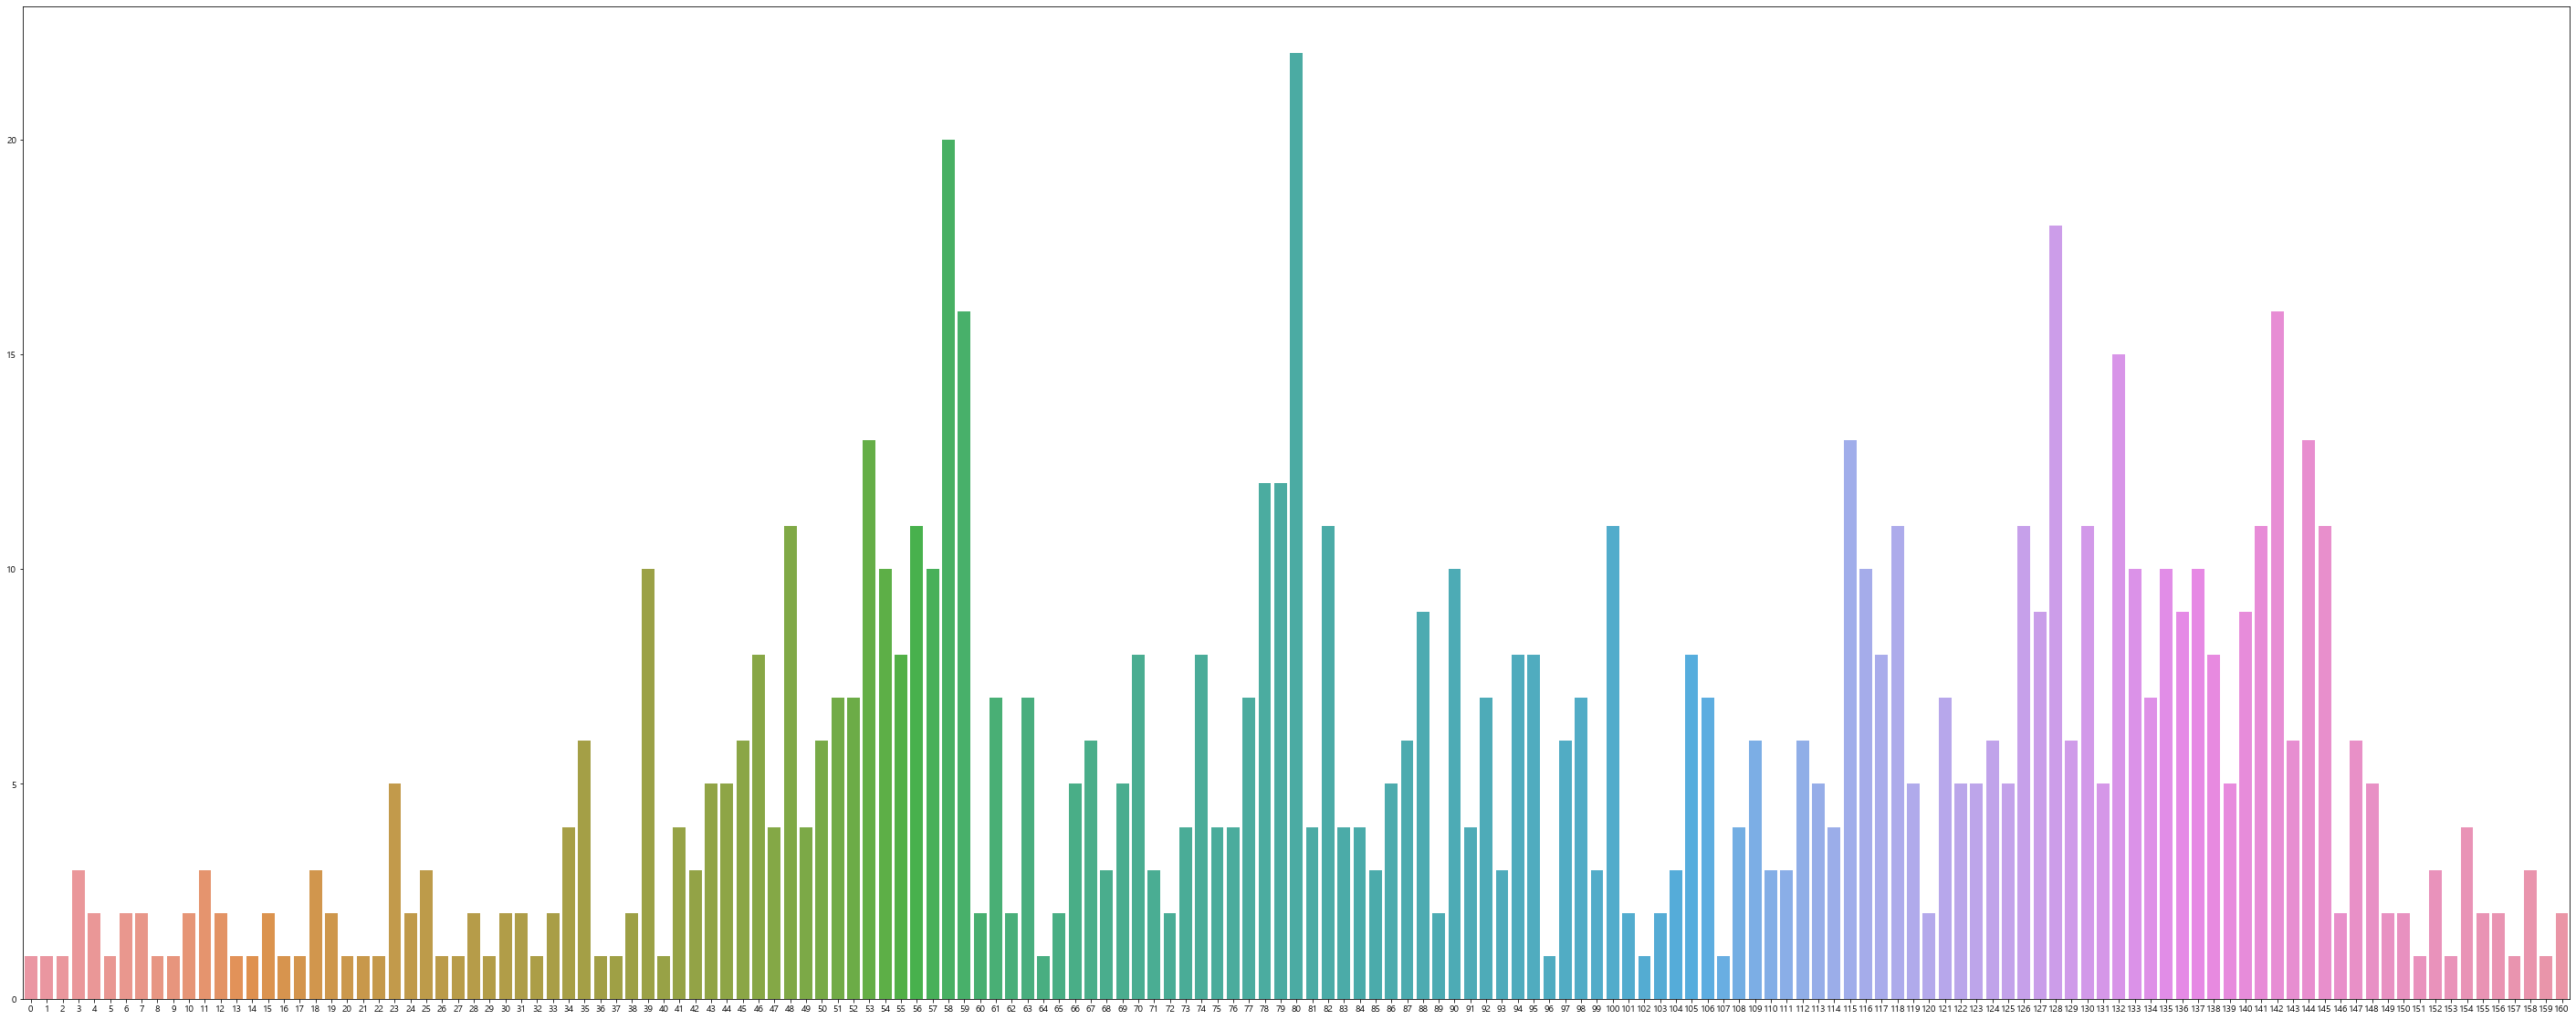

In [18]:
# 시각화 (월별(전체) - 월별 특허수)
fig = plt.figure(figsize=(50, 20))
sns.barplot(df_count['출원년월'].index, df_count['출원번호'].values)
plt.show()
fig.savefig('./data/월별특허수(삼성SDI).png')

In [146]:
# 연월을 합치기 위한 merge
# df_mean = '월별', df_count = '출원년월' -> '월별'
df_count.rename(columns = {'출원년월' : '월별'}, inplace=True)

df_merge = pd.merge(df_mean, df_count, how='outer', on='월별')

# 월별로 재배열 후 index 재설정
df_merge.sort_values('월별',inplace=True)
df_merge.reset_index(drop=True, inplace=True)

# NaN 값은 0으로 대체
df_merge.fillna(0,inplace=True)

df_merge

,월별,월별 평균종가,출원번호
0,2004-11,0.000000,1.0
1,2005-03,0.000000,1.0
2,2005-04,0.000000,1.0
3,2005-05,0.000000,3.0
4,2006-02,0.000000,2.0
...,...,...,...
176,2021-06,278704.545455,1.0
177,2021-07,265113.636364,3.0
178,2021-08,242000.000000,1.0
179,2021-09,250421.052632,2.0


<ipython-input-133-06efa2b3b361>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot()


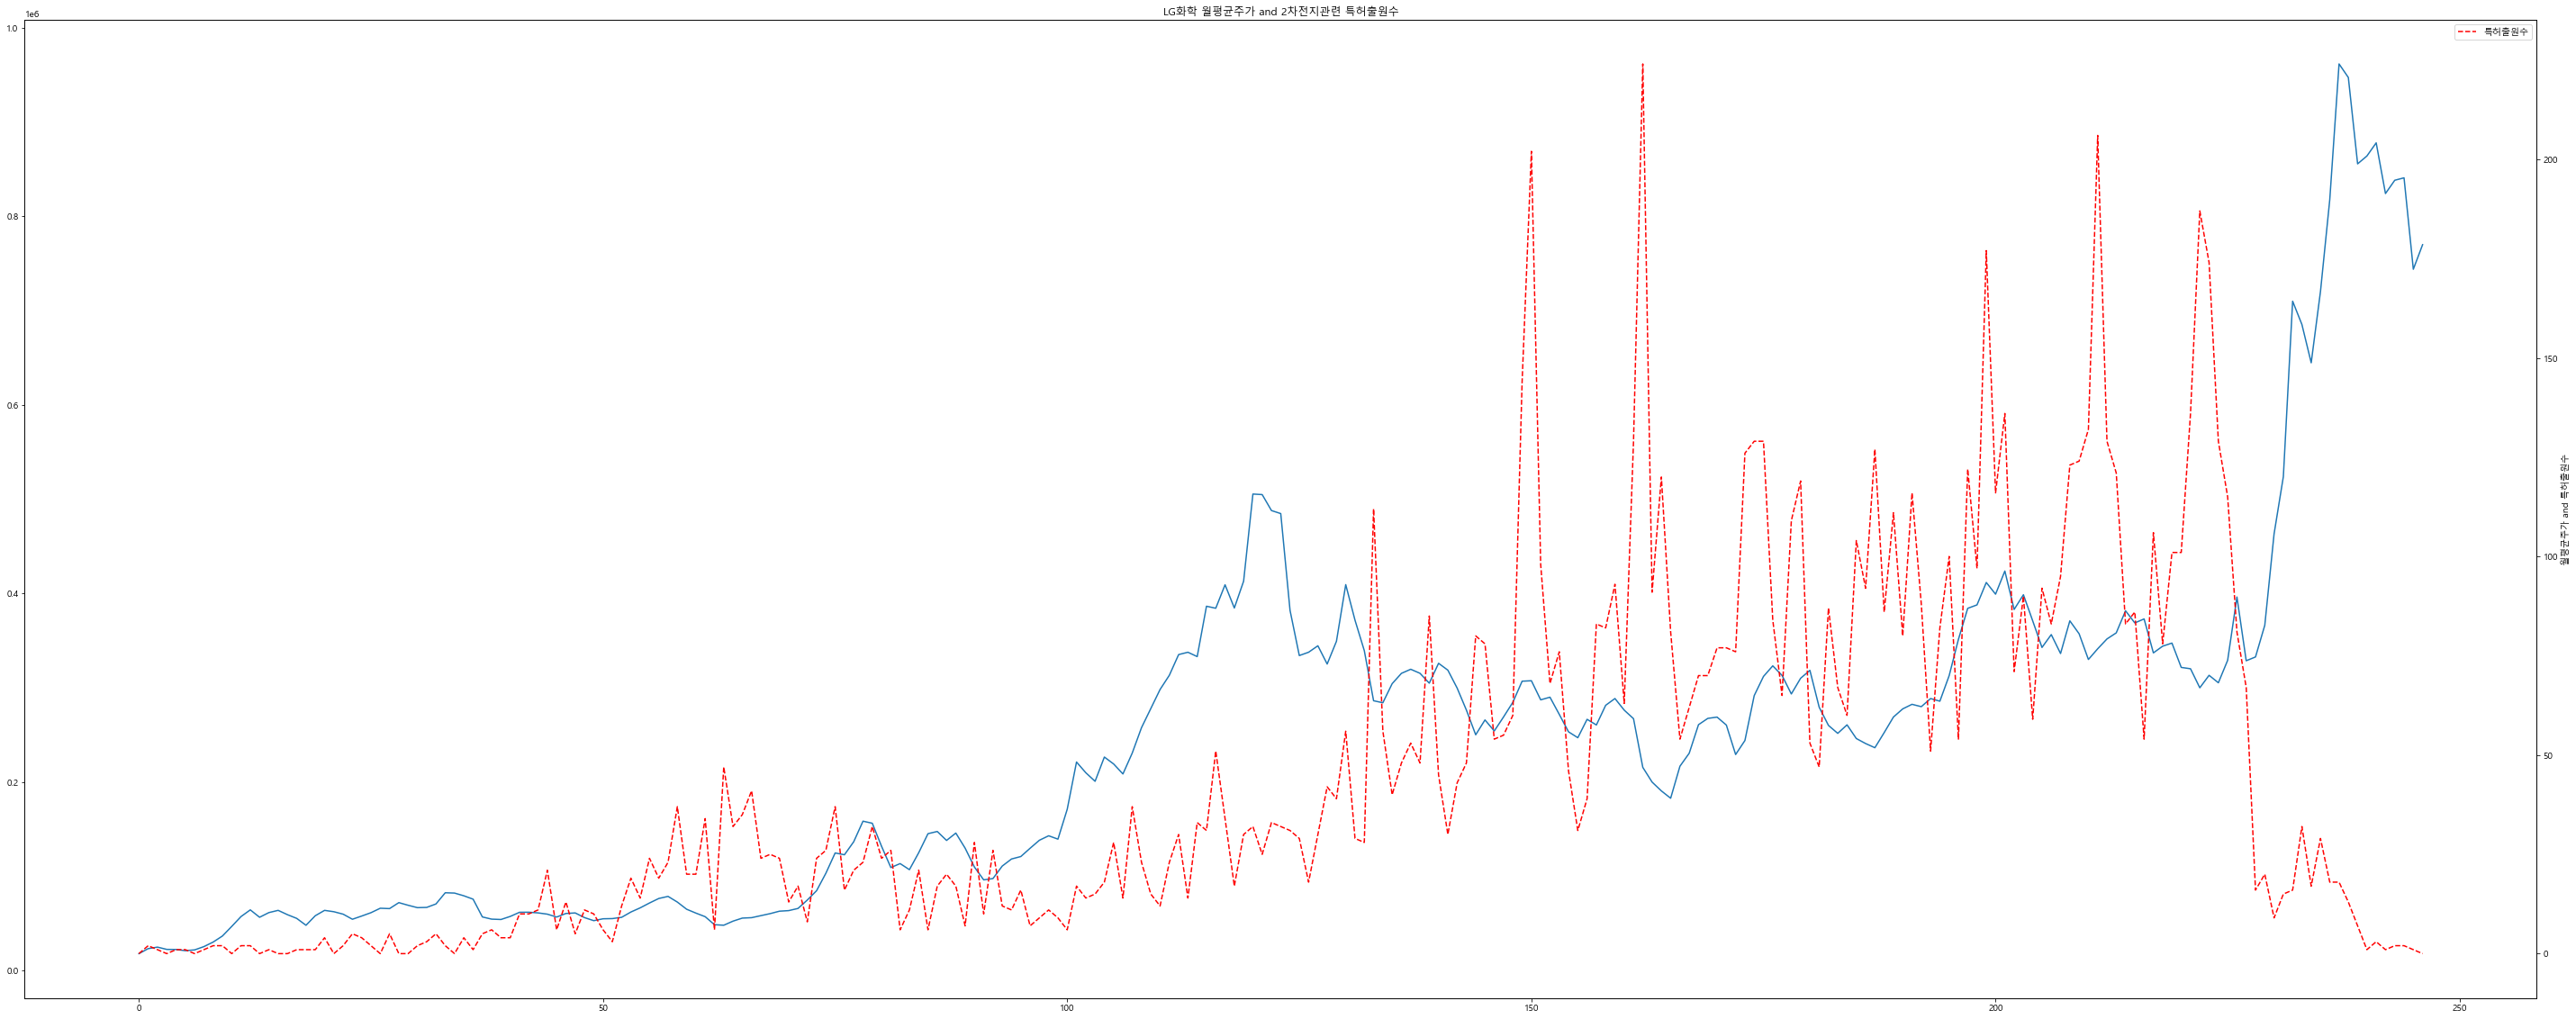

In [133]:
# 이중 Y축을 이용한 subplot
fig = plt.figure(figsize=(50, 20))
plt.title('SK이노베이션 월평균주가 and 2차전지관련 특허출원수')
x = df_merge['월별'].index
y_1 = df_merge['월별 평균종가'].values
y_2 = df_merge['출원번호'].values

ax1 = plt.subplot()
ax1.plot(x, y_1, label='월평균주가')

ax2 = ax1.twinx()
ax2.plot(x, y_2, 'r--', label='특허출원수')

plt.ylabel('월평균주가 and 특허출원수')
plt.xlabel('기준 월')
plt.legend(loc='best')
plt.show()
fig.savefig('./data/SK이노베이션 월평균주가-2차전지관련 특허출원수.png')